<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 5</p><br>

##
<span style="font-wight:bold;font-size:20px">1. Text Data analysis:</span> using “lincoln-last-speech.txt” which contains Lincoln’s last public address. Now answer the following questions and include your codes.

In [1]:
#TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

##### a) Read the text and store the text in lAddress. Show the first 70 characters from the first element of the text.

In [2]:
#TODO
from nltk.tokenize import word_tokenize
IAdress=open('lincoln-last-speech.txt','r')
IAdress.read(70)

'We meet this evening, not in sorrow, but in gladness of heart. The eva'

##### b) Now we are interested in the words used in his speech. Extract all the words from lAddress, convert all of them to lower case and store the result in vWord. Display first few words.

In [3]:
#TODO
IAdress.seek(0)
vWord=IAdress.read().lower()
vWord[:10]


'we meet th'

##### c) The words like am, is, my or through are not much of our interest and these types of words are called stop-words. Get all the English stop words and store them in sWord. Display few stop words in your report.

In [4]:
#TODO
import nltk

In [ ]:
nltk.download('stopwords')

In [7]:
from nltk.corpus import stopwords
sWord=stopwords.words('english')
print(sWord[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


##### d) Remove all the sWord from vWord and store the result in cleanWord. Display first few clean words.

In [8]:
#TODO
IAdress.seek(0)
punctuation='!"#$%&\'()*+,--./:;<=>?@[\\]^__``{|}~'
vWord = word_tokenize(IAdress.read().lower())
for token in vWord:
    if token in punctuation:
      vWord.remove(token)

eng_stopwords = stopwords.words('english')
rm_count = 0
cleanWords = [] 

for token in vWord:
    if token not in eng_stopwords:
        cleanWords.append(token)
    else: rm_count += 1
print(cleanWords[:10])

['meet', 'evening', 'sorrow', 'gladness', 'heart', 'evacuation', 'petersburg', 'richmond', 'surrender', 'principal']


##### f) Construct a bar chart showing the count of each words for the 15 most frequently used words.

In [9]:
from nltk.probability import FreqDist
top_15=FreqDist(cleanWords)
top=top_15.most_common(15)
list(top)

[('louisiana', 18),
 ('government', 12),
 ('plan', 11),
 ('state', 11),
 ('union', 11),
 ('new', 10),
 ('states', 10),
 ('would', 8),
 ('proper', 8),
 ('question', 7),
 ('one', 6),
 ('whether', 6),
 ('must', 5),
 ('part', 5),
 ('man', 5)]

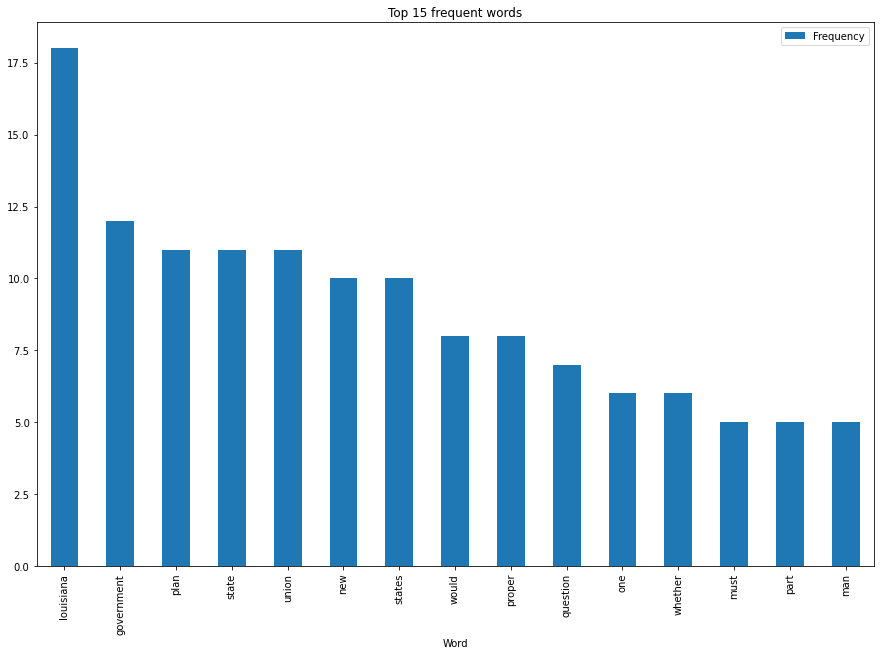

In [10]:
import pandas as pd
df=pd.DataFrame(top, columns = ["Word","Frequency"])
df.sort_values(by="Frequency", ascending=False)
df = df.reset_index(drop=True)
df1=df.head(15)
ax=df1.plot.bar(x='Word',y='Frequency',figsize=(15,10), title='Top 15 frequent words')
ax

##### h) The plot in question (1f) uses bar plot to display the data. Can you think of another plot that delivers the same information but looks much simpler? Demonstrate your answer by generating such a plot.

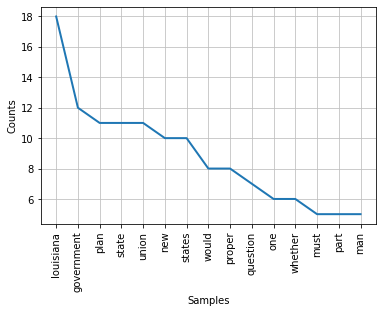

In [11]:
#TODO
%matplotlib inline
top_15.plot(15)


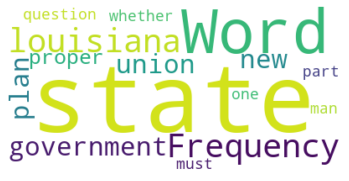

In [12]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(df1))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##
<span style="font-wight:bold;font-size:20px">2. Answering Questions from Data:</span> Download the data from [ 
https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/flights.csv ]. Answer the following questions using this data.


##### a) What month had the highest proportion of cancelled flights? What month had the lowest? Interpretany seasonal patterns. Please produce a plot that illustrates the proportion of cancelled flights for each month.

In [13]:
df=pd.read_csv('flights1.csv')
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [14]:
df['Cancel']=df['arr_time'].apply(lambda x:True if x==0 else False)


##### b) What plane (specified by the tailnum variable) traveled the most times from New York City airports in 2013? Plot the number of trips per week over the year.

In [15]:
d = pd.DataFrame(df)
d['time_hour'] = pd.to_datetime(d['time_hour'])
d['Week'] = d['time_hour'].dt.isocalendar().week
d.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,Cancel,Week
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,False,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,False,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,False,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,False,1
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,False,1


Week  tailnum
20    N304JB     26
32    N328JB     26
33    N358JB     25
23    N296JB     23
48    N179JB     22
                 ..
8     N590AA      1
      N588JB      1
      N585UA      1
      N584JB      1
52    N997AT      1
Name: tailnum, Length: 72265, dtype: int64


<Figure size 2160x216 with 0 Axes>

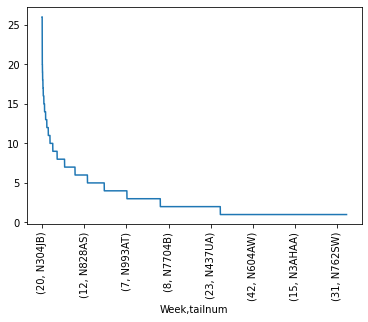

<Figure size 2160x216 with 0 Axes>

In [16]:
#TODO
total=d[(d['origin'] == 'JFK')| (d['origin'] == 'LGA') & (d['year'] == 2013)].groupby('Week')['tailnum'].value_counts().sort_values(ascending=False)
print(total)
total.plot()
plt.xticks(rotation=90)
plt.figure(figsize = (30,3))

##### c) Download the plane data from [ https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/planes.csv ]. Use the flights and planes tables to answer the following questions: What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013? How many airplanes that flew from New York City are included in the planes table?

In [17]:
#TODO
df1=pd.read_csv('planes.csv')
df1.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [18]:
#the planes that exist in flights dataset
new = df[(df['year'] == 2013)&((df['origin'] == 'JFK')|(df['origin'] == 'LGA'))]
df3=pd.merge(df1.reset_index(), new, how='inner').set_index('index')
df4=df3.to_csv('new1.csv')
df4=pd.read_csv('new1.csv')
df4.head()

,index,tailnum,year,type,manufacturer,model,engines,seats,speed,engine,...,flight,origin,dest,air_time,distance,hour,minute,time_hour,Cancel,Week
0,215,N150UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,NaN,Turbo-fan,...,1895,LGA,CLT,91.0,544,12,59,2013-10-07 12:00:00,False,41
1,215,N150UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,NaN,Turbo-fan,...,2085,LGA,CLT,98.0,544,6,30,2013-10-10 06:00:00,False,41
2,215,N150UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,NaN,Turbo-fan,...,894,LGA,CLT,85.0,544,17,5,2013-10-12 17:00:00,False,41
3,215,N150UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,NaN,Turbo-fan,...,1831,JFK,CLT,88.0,541,8,25,2013-10-14 08:00:00,False,42
4,215,N150UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,NaN,Turbo-fan,...,2069,LGA,CLT,91.0,544,11,30,2013-10-25 11:00:00,False,43


In [19]:
total=df4.groupby('tailnum')['year'].value_counts().sort_values(ascending=False).nlargest(5)
print(total)

tailnum  year  
N354JB   2013.0    286
N355JB   2013.0    253
N358JB   2013.0    247
N374JB   2013.0    219
N368JB   2013.0    205
Name: year, dtype: int64


In [20]:
num=df4.groupby('tailnum')['tailnum'].count().sum()
print(f'number of plane flew :{num}')

number of plane flew :2712


##### d) Use the flights and planes tables to answer the following questions: How many planes have a missing date of manufacture? What are the five most common manufacturers (Note: pay close attention to the same manufacturer being represented multiple times)? Has the distribution of manufacturer changed over time as reflected by the airplanes flying from NYC in 2013? Produce a plot that backs up your claim.

In [22]:
#TODO
manu=df1.groupby('manufacturer')['year'].value_counts().sort_values(ascending=False).nlargest(5)
print(manu)

manufacturer      year  
BOEING            2001.0    142
                  2000.0    134
                  1999.0    124
                  1998.0    103
AIRBUS INDUSTRIE  2001.0     82
Name: year, dtype: int64


##
<span style="font-wight:bold;font-size:20px">3. Regular Expressions:</span> Write a regular expression to match patterns in the following strings. Demonstrate
that your regular expression indeed matched that pattern by including codes and results.

##### a) We have a list vText as follows. Write a regular expression that matches g, og, go or ogo in vText and replace the matches with ‘.’.

In [23]:
import re


In [24]:
vText = ['google','logo','dig', 'blog', 'boogie']
re.sub(pattern=r'g|og|go|ogo', string=str(vText), repl='.')

"['.o.le', 'l.o', 'di.', 'bl.', 'bo.ie']"

##### b) Replace only the 5 or 6 digit numbers with the word “found” in the following list. Please make sure that 3, 4, or 7 digit numbers do not get changed.

In [25]:
#TODO
vPhone = ['874','6783','345345', '32120', '468349', '8149674']
Phone=re.findall(r"\b\d{5,6}\b", str(vPhone))
print(Phone)
re.sub(pattern=r'\b\d{5,6}\b', string=str(vPhone), repl='found')

['345345', '32120', '468349']


"['874', '6783', 'found', 'found', 'found', '8149674']"

##### c) Replace all the characters that are not among the 26 English characters or a space. Please replace with an empty spring.

In [26]:
#TODO
myText = "#y%o$u @g!o*t t9h(e) so#lu!tio$n c%or_r+e%ct"
re.sub(pattern=r'[^a-zA-Z]', string=myText, repl=' ')

' y o u  g o t t h e  so lu tio n c or r e ct'

##### d) In the following text, replace all the words that are exactly 3 or 4 characters long with triple dots ‘. . . ’

In [27]:
#TODO
myText = "Each of the three and four character words will be gone now"
re.sub(pattern=r'\b[a-zA-Z]{3,4}\b', string=myText, repl='...')

'... of ... three ... ... character words ... be ... ...'

##### e) Extract all the three numbers embedded in the following text.

In [28]:
#TODO
bigText = 'There are four 20@14 numbers hid989den in the 500 texts'
text=re.sub(pattern=r'(?<=[0-9./])\W+(?=[0-9./])', string=bigText, repl='')
print(text)
re.findall(r"\d+", text)


There are four 2014 numbers hid989den in the 500 texts


['2014', '989', '500']

##### f) Extract all the words between parenthesis from the following string text and count number of words.

In [29]:
#TODO
myText = 'The salries are reported (in millions) for every company.'
text=re.search(r'\((.*?)\)',myText).group(1)
print(text)


in millions


##### g) Extract the texts in between _ and dot(.) in the following list. Your output should be ‘bill’, ‘pay’, ‘fine-book’.

In [30]:
#TODO
myText = ["H_bill.xls", "Big_H_pay.xls", "Use_case_fine-book.pdf"]
text=re.sub(pattern=r'\w+_', string=str(myText), repl='')
print(text)
t=re.findall('(\S*)[.]', string=str(text))
for i in t:
  print(i,end=' ')

['bill.xls', 'pay.xls', 'fine-book.pdf']
['bill 'pay 'fine-book 

##### h) Extract the numbers (return only integers) that are followed by the units ‘ml’ or ‘lb’ in the following text.

In [31]:
#TODO
myText = 'Received 10 apples with 200ml water at 8pm with 15 lb meat and 2lb salt'
t=re.findall(r'(\d+(?=\s?ml?\b)|\d+(?=\s?lb?\b))', str(myText))
for i in t:
  print(int(i),end=' ')

200 15 2 

##### i) Extract only the word in between pair of symbols \\$. Count number of words you have found between pairs of dollar sign \\$

In [32]:
#TODO
myText = 'Math symbols are $written$ in $between$ dollar $signs$'
text=re.findall(r'\$(.*?)\$',myText)
print(text)
print(len(text))

['written', 'between', 'signs']
3


##### j) Extract all the valid equations in the following text.

In [33]:
#TODO
myText = 'equation1: 2+3=5, equation2 is: 2*3=6, do not extract 2w3=6'
re.findall(r'\b\w+(?:[+\*]\w+)+=\w+\b', str(myText))

['2+3=5', '2*3=6']